In [90]:
# import all necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Daily Challenge: Data Cleaning And Transformation With Real-World Datasets

In [91]:
# load the dataset
df = pd.read_csv(r'/content/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head()

<ipython-input-91-2a0e868b0717>:2: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##1. Data Cleaning:

In [99]:
#check columns names
df.columns

Index(['eventid', 'year', 'month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'country_name', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [107]:
#Renaming the columns
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country_name','provstate':'state',
                       'region_txt':'region_name','attacktype1_txt':'attack_type','target1':'target','nkill':'killed',
                       'nwound':'wounded','gname':'group','targtype1_txt':'target_type',
                       'weaptype1_txt':'weapon_type','motive':'motive'},inplace=True)

In [108]:
df.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country_name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [109]:
# As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing
df = df[['year','month','day','country_name','state','region_name','city','latitude','longitude','attack_type','killed',
        'wounded','target','summary','group','target_type','weapon_type','motive']]

In [110]:
#Check the null values
df.isnull().sum()

year                 0
month                0
day                  0
country_name         0
state              421
region_name          0
city               434
latitude          4556
longitude         4557
attack_type          0
killed           10313
wounded          16311
target             636
summary          66129
group                0
target_type          0
weapon_type          0
motive          131130
dtype: int64

In [111]:
df.shape

(181691, 18)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          181691 non-null  int64  
 1   month         181691 non-null  int64  
 2   day           181691 non-null  int64  
 3   country_name  181691 non-null  object 
 4   state         181270 non-null  object 
 5   region_name   181691 non-null  object 
 6   city          181257 non-null  object 
 7   latitude      177135 non-null  float64
 8   longitude     177134 non-null  float64
 9   attack_type   181691 non-null  object 
 10  killed        171378 non-null  float64
 11  wounded       165380 non-null  float64
 12  target        181055 non-null  object 
 13  summary       115562 non-null  object 
 14  group         181691 non-null  object 
 15  target_type   181691 non-null  object 
 16  weapon_type   181691 non-null  object 
 17  motive        50561 non-null   object 
dtypes: f

In [113]:
# get basic statistic
df.describe()

,year,month,day,latitude,longitude,killed,wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## 2. Data Transformation:

In [114]:
# Normalize or standardize numerical features as required.
Numeric_Columns = df[['year', 'month', 'day', 'latitude', 'longitude', 'killed', 'wounded']]
scaler = MinMaxScaler()
Numeric_Columns = scaler.fit_transform(Numeric_Columns)

scaler_Z = StandardScaler()
Numeric_Columns = scaler_Z.fit_transform(Numeric_Columns)

## 3. Exploratory Data Analysis:

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

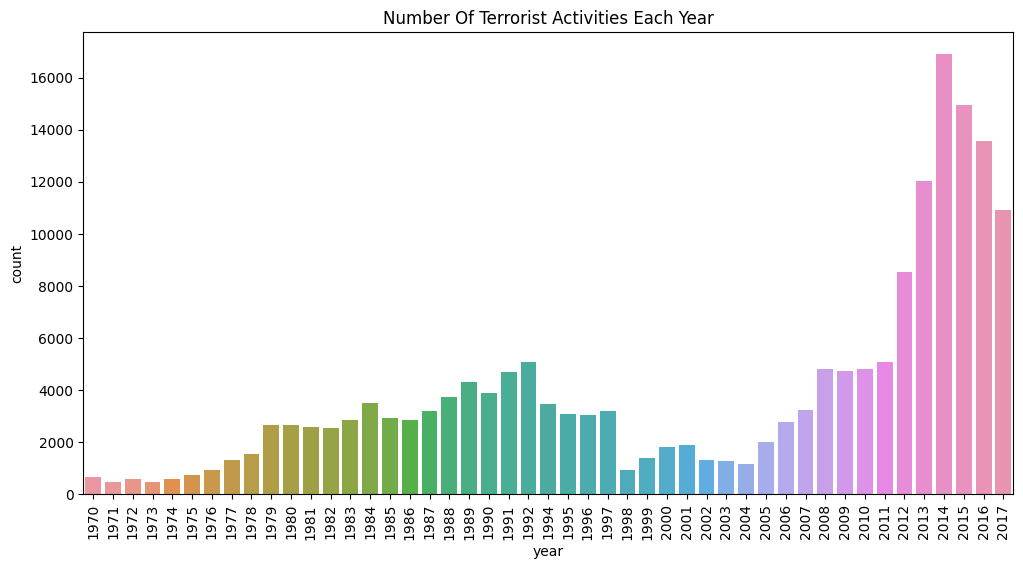

In [115]:
# Number of Terrorist Activities each Year
plt.subplots(figsize=(12, 6))
sns.countplot(x='year', data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')

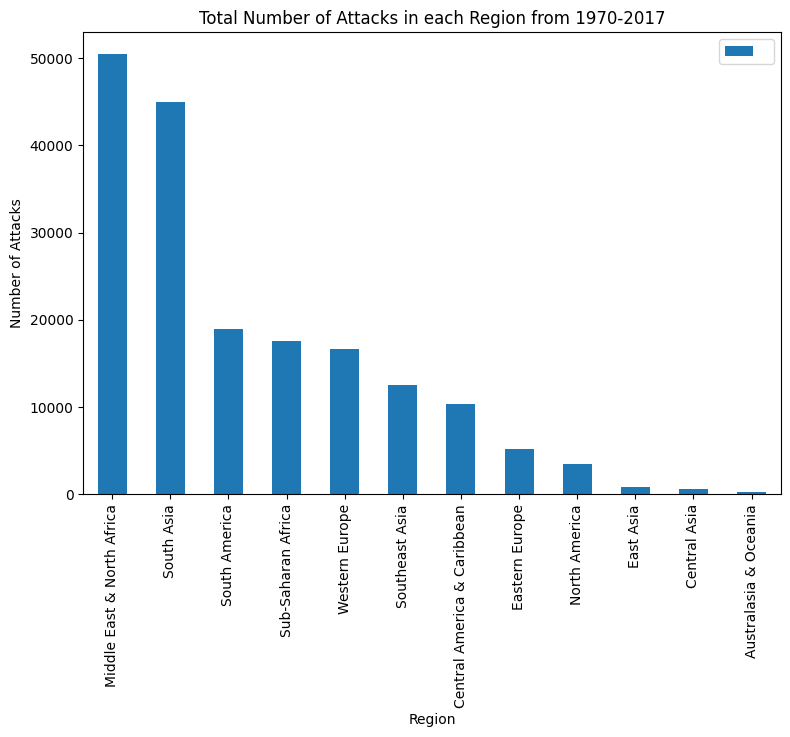

In [138]:
# Number of Terrorist Activities each Year in Different Regions
reg_ter = df.groupby('region_name').agg({'year':'count'}).sort_values(by='year', ascending = False)

reg_ter.plot(kind="bar", figsize=(9,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.legend(" ")
plt.show()

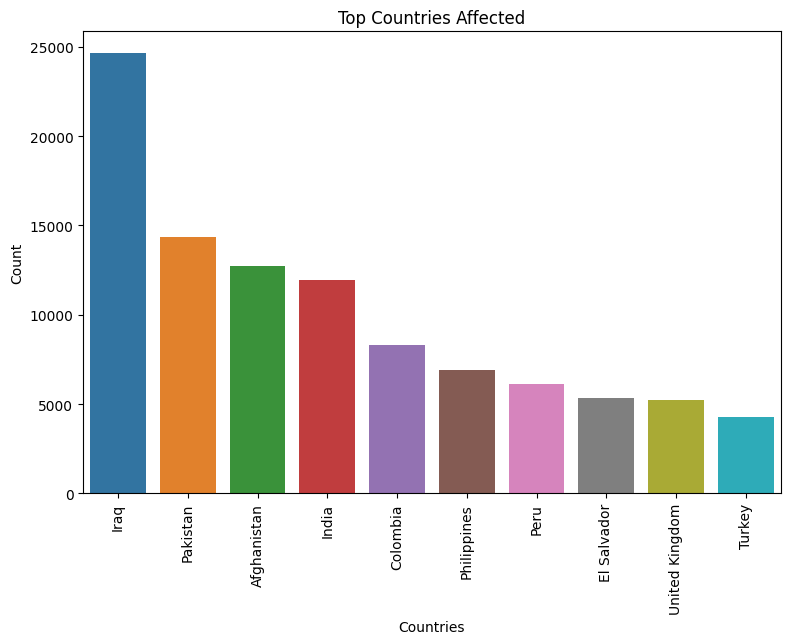

In [142]:
# Top Countries affected by Terror Attacks
top_countries = df['country_name'].value_counts()[:10]

plt.subplots(figsize=(9, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

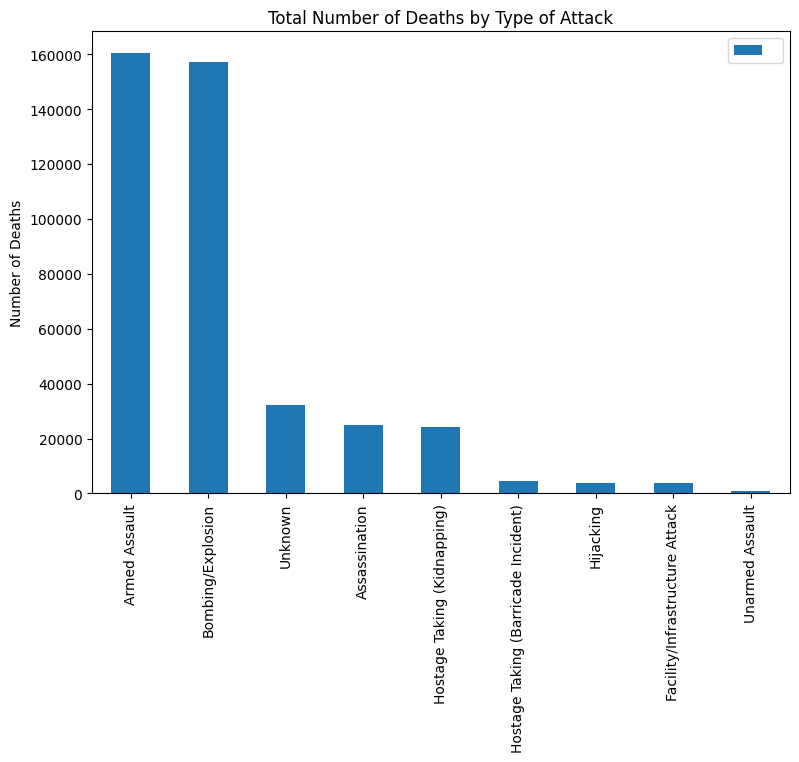

In [153]:
# Types of terrorist attacks that cause deaths
kill_type = df.groupby('attack_type').agg({'killed':'sum'}).sort_values(by='killed', ascending=False)

kill_type.plot(kind="bar", figsize=(9,6))
plt.title("Total Number of Deaths by Type of Attack")
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Number of Deaths")
plt.legend(" ")
plt.show()

<ipython-input-88-89574a6cafce>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



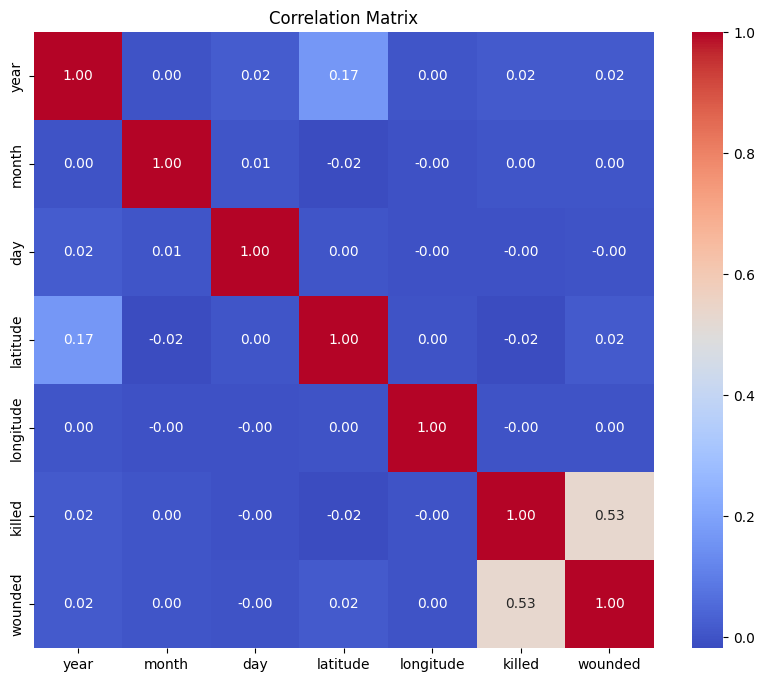

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()